# Extramarital Affairs
### Elaborado por: 
##### Zuly, Andrea, Maria & Daniela

### Cargando las librerías

In [1]:
# importando modulos que se van a usar
import os, sys
import numpy as np
import pandas as pd
import pandas_profiling

# module to do statistics
import scipy.stats  as stats
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
import pandas_profiling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.tools.plotting import scatter_matrix
from statsmodels.graphics.regressionplots import influence_plot
import scipy.stats as stats# Funciones adicionales
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


## Leyendo los datos

In [2]:
datos_ = pd.read_csv("Affairs.csv")


In [3]:
datos_.head(n=3)

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,male,37.0,10.0,no,3,18,7,4,0
1,2,female,27.0,4.0,no,4,14,6,4,0
2,3,female,32.0,15.0,yes,1,12,1,4,0


### Limpiando los datos

In [4]:
datos=datos_.drop('Unnamed: 0',axis=1)
datos.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [5]:
datos.columns

Index(['sex', 'age', 'ym', 'child', 'religious', 'education', 'occupation',
       'rate', 'nbaffairs'],
      dtype='object')

### Mirada general a los datos

In [6]:
# Usando pandas profiling
pandas_profiling.ProfileReport(datos)

Number of variables,9
Number of observations,601
Total Missing (%),0.0%
Total size in memory,42.3 KiB
Average record size in memory,72.1 B
Numeric,7
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Veamos otros gráficos de interés

In [7]:
import matplotlib.pyplot as plt

#### Distribución del número de afair por género

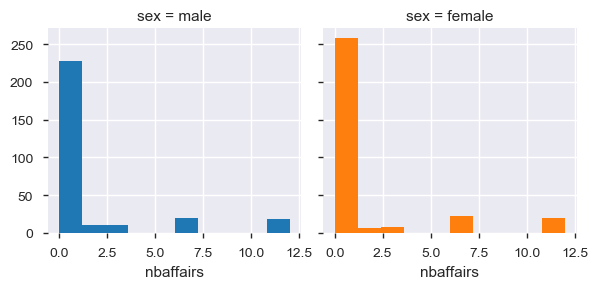

In [8]:
g=sns.FacetGrid(datos, col="sex", hue='sex')
g = g.map(plt.hist, "nbaffairs")

#### Por el nivel de felicidad en su relación

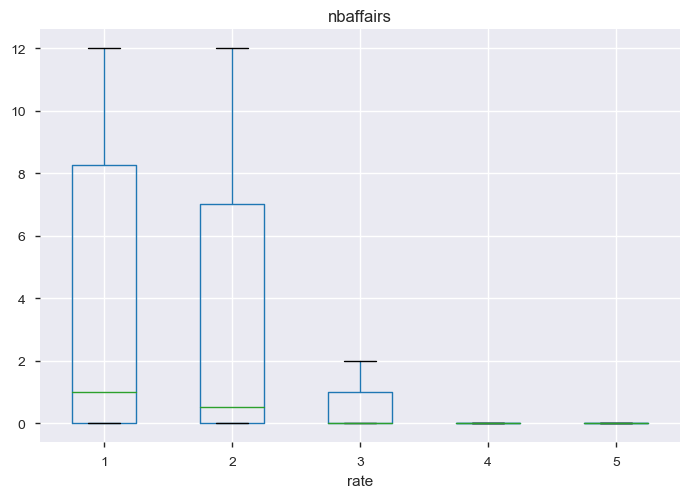

In [9]:
datos.boxplot('nbaffairs',by='rate')
plt.suptitle("")
plt.show()

#### Por religión

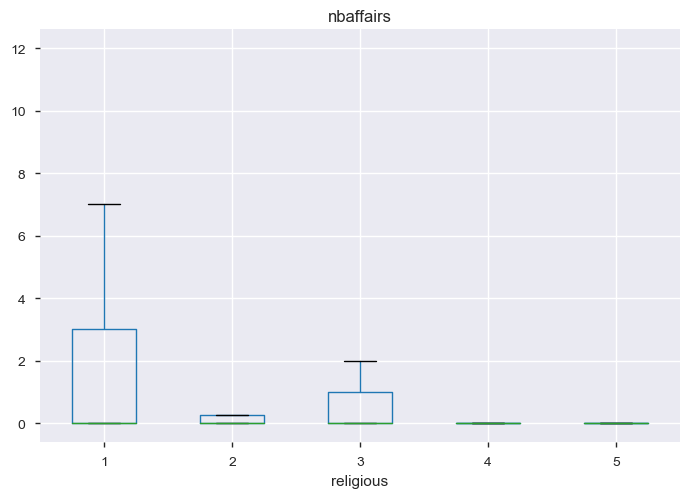

In [10]:
datos.boxplot('nbaffairs',by='religious')
plt.suptitle("")
plt.show()

#### Creando la variable de estado

In [11]:
datos['estado'] = [0 if  x== 0 else 1 for x in datos['nbaffairs']] ##Cero fiel, uno infiel

In [12]:
datos.tail(n=3)

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,estado
598,male,32.0,10.0,yes,2,17,6,5,2,1
599,male,22.0,7.0,yes,3,18,6,2,2,1
600,female,32.0,15.0,yes,3,14,1,5,1,1


#### Generando las variables dumies para las categóricas

In [13]:
cat_list_0 = pd.get_dummies(datos['sex'], prefix='sex')
cat_list_1 = pd.get_dummies(datos['child'], prefix='child')
cat_list_2 = pd.get_dummies(datos['religious'], prefix='religious')
cat_list_3 = pd.get_dummies(datos['rate'], prefix='rate')

In [14]:
datos_cat=pd.concat([datos,cat_list_0,cat_list_1, cat_list_2, cat_list_3], axis=1)
datos_cat.columns

Index(['sex', 'age', 'ym', 'child', 'religious', 'education', 'occupation',
       'rate', 'nbaffairs', 'estado', 'sex_female', 'sex_male', 'child_no',
       'child_yes', 'religious_1', 'religious_2', 'religious_3', 'religious_4',
       'religious_5', 'rate_1', 'rate_2', 'rate_3', 'rate_4', 'rate_5'],
      dtype='object')

In [15]:
data_0=datos.join(cat_list_0)
data_1=data_0.join(cat_list_1)
data_2=data_1.join(cat_list_2)
data=data_2.join(cat_list_3)
data.tail(n=3)

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,estado,...,religious_1,religious_2,religious_3,religious_4,religious_5,rate_1,rate_2,rate_3,rate_4,rate_5
598,male,32.0,10.0,yes,2,17,6,5,2,1,...,0,1,0,0,0,0,0,0,0,1
599,male,22.0,7.0,yes,3,18,6,2,2,1,...,0,0,1,0,0,0,1,0,0,0
600,female,32.0,15.0,yes,3,14,1,5,1,1,...,0,0,1,0,0,0,0,0,0,1


In [16]:
data.columns

Index(['sex', 'age', 'ym', 'child', 'religious', 'education', 'occupation',
       'rate', 'nbaffairs', 'estado', 'sex_female', 'sex_male', 'child_no',
       'child_yes', 'religious_1', 'religious_2', 'religious_3', 'religious_4',
       'religious_5', 'rate_1', 'rate_2', 'rate_3', 'rate_4', 'rate_5'],
      dtype='object')

In [29]:
X=pd.DataFrame(data=data, columns=['age','ym','sex_female','rate_1', 'rate_2', 'rate_3', 'rate_4'])

In [30]:
X.head()

,age,ym,sex_female,rate_1,rate_2,rate_3,rate_4
0,37.0,10.00,0,0,0,0,1
1,27.0,4.00,1,0,0,0,1
2,32.0,15.00,1,0,0,0,1
3,57.0,15.00,0,0,0,0,0
4,22.0,0.75,0,0,0,1,0


In [31]:
y=data['estado']

In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: estado, dtype: int64

In [33]:
y.tail()

596    1
597    1
598    1
599    1
600    1
Name: estado, dtype: int64

In [34]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.521285
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 estado   No. Observations:                  601
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            6
Date:                Sat, 23 Mar 2019   Pseudo R-squ.:                 0.07224
Time:                        00:25:09   Log-Likelihood:                -313.29
converged:                       True   LL-Null:                       -337.69
                                        LLR p-value:                 8.205e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0725      0.009     -7.748      0.000      -0.091      -0.054
ym             0.1201      0.